# Flight location exploratory data analysis 

Exploratory data analysis of flight data in or near German airspace

# 1. Install Basemap
Install the packages required to use Basemap for plotting co-ordinates onto a map

In [ ]:
!pip install PROJ

     |████████████████████████████████| 51kB 3.0MB/s 


In [ ]:
!apt-get install libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 59 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (151 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

     \ 198.6MB 143.8MB/s
     |████████████████████████████████| 10.9MB 3.3MB/s 
     |████████████████████████████████| 225kB 47.2MB/s 
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756011 sha256=21d0a91610fc07b1e5a0705fef7b51eb23e032ab04628f3709b0baa66113aa98
  Stored in directory: /tmp/pip-ephem-wheel-cache-nm9v3sen/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=fd0011d289fc9a76985de7b3db9ce4d4d417fc81fd2eb604d17b13dcf716e043
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built basemap pyshp


# 2. Install dependencies

In [ ]:
import pandas as pd
import urllib
import seaborn as sns
from matplotlib import pyplot as plt
from pyarrow import parquet, BufferReader
from mpl_toolkits.basemap import Basemap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 3. Data import

Imported the parquet file of flight data points, converted them into a Dataframe and then sorted using the recorded time (dataset index)

In [ ]:
url = urllib.request.urlopen(r"https://github.com/DSDEV27001/files/raw/master/python_test_gluoNNet.parquet")
r = BufferReader(url.read())
df = parquet.read_table(r).to_pandas().sort_index()

# 4. Data analysis

**Assumptive data column meanings**




1.   ts (index) is the timestamp a flight is at the specified location
2.   geom_Height is the Geometric Height described as the vertical distance above a reference point, commonly the terrain elevation
3.   Alt is the actual elevation above mean sea level corrected for non-standard temperature and pressure
4. Flight_level_5km is the flight level of an aircraft's altitude at standard air pressure, expressed in hundreds of feet
5.Flight_Nr is the flight number 









In [ ]:
# Random sample of data
df.sample(10)

,Emitter_Id,Lat,Lon,geom_Height,Flight_level_5km,Alt,Flight_Nr
ts,,,,,,,
2019-04-01 13:40:59.265000+00:00,3C6482,48.767193,12.136568,14775.0,147.50,NaN,DLH2KK
2019-04-01 17:13:42.476000+00:00,3C4A8B,51.125748,16.832613,32575.0,330.00,NaN,DLH712
2019-04-01 19:00:55.765000+00:00,3C6584,52.767426,10.637512,NaN,228.00,NaN,DLH8XT
2019-04-01 06:43:26.312000+00:00,3C65CD,55.062881,12.465605,11725.0,115.50,8000.0,DLH824
2019-04-01 05:24:44.335000+00:00,3C658E,50.091705,8.636772,NaN,34.75,NaN,DLH5EM
2019-04-01 11:29:38.265000+00:00,3C675A,51.119572,11.560745,28350.0,284.25,NaN,DLH7WL
2019-04-01 20:18:24.914000+00:00,3C658C,50.073681,10.231909,NaN,269.50,NaN,DLH4HW
2019-04-01 13:13:58.109000+00:00,3C66BA,51.956451,10.171585,12575.0,122.50,7000.0,DLH2NM
2019-04-01 04:20:46.585000+00:00,3C674F,50.771164,5.267647,16825.0,167.75,NaN,DLH4W


In [ ]:
# Summary column info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203743 entries, 2019-04-01 01:58:32.640000+00:00 to 2019-04-01 21:39:08.421000+00:00
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Emitter_Id        203743 non-null  object 
 1   Lat               203743 non-null  float32
 2   Lon               203743 non-null  float32
 3   geom_Height       153042 non-null  float64
 4   Flight_level_5km  191646 non-null  float64
 5   Alt               47408 non-null   float64
 6   Flight_Nr         203743 non-null  object 
dtypes: float32(2), float64(3), object(2)
memory usage: 10.9+ MB


In [ ]:
# Unique values in each column
df.nunique()

Emitter_Id             273
Lat                 148782
Lon                 171872
geom_Height           1619
Flight_level_5km      1636
Alt                    144
Flight_Nr             1257
dtype: int64

In [ ]:
# descriptive statistics
df.describe()

,Lat,Lon,geom_Height,Flight_level_5km,Alt
count,203743.000000,203743.000000,153042.000000,191646.000000,47408.000000
mean,50.329494,11.027264,25136.683721,250.765603,23681.301679
std,2.419361,2.998480,11810.959625,119.887385,13026.144708
min,45.831161,3.557373,-50.000000,-5.000000,900.000000
25%,48.433731,8.756846,15125.000000,148.500000,10025.000000
50%,50.037437,11.132524,29875.000000,297.750000,28000.000000
75%,51.908770,13.083364,35025.000000,350.250000,35000.000000
max,56.503235,17.316513,41025.000000,410.250000,54500.000000


In [ ]:
# Flights with the top 10 total count of flight locations
df.Flight_Nr.value_counts().head(10)

DLH653     929
DLH631     906
DLH591     904
DLH521     887
DLH727     880
DLH627     876
DLH797     850
DLH773     842
DLH2567    821
DLH693     809
Name: Flight_Nr, dtype: int64

In [ ]:
# Emitters with top 10 total count of flight locations
df.Emitter_Id.value_counts().head(10)

3C66E1    2722
3C65CA    2319
3C6621    2066
3C65C9    2055
3C674E    2026
3C6445    1935
3C6582    1881
3C6599    1853
3C66B5    1836
3C66B2    1824
Name: Emitter_Id, dtype: int64

# 5. Data visualisation


[link text](https://)## Fig. 1, frequency histograms of numerical columns

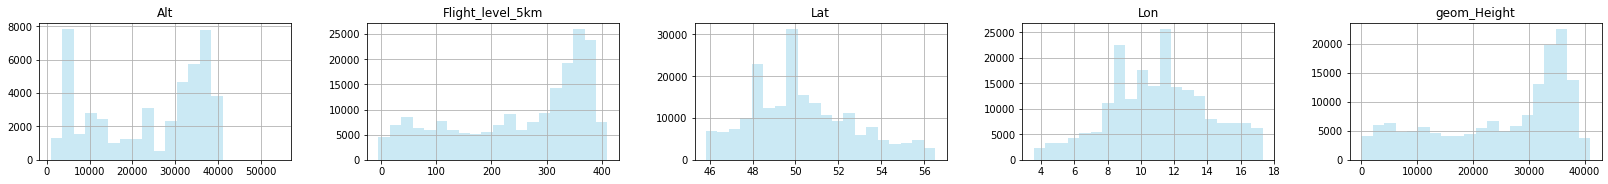

In [ ]:
a=df.hist(layout=(10,5), figsize=(28, 32),bins=20,grid=True,color='#cbe9f4')

## Fig. 2, heatmap showing Pearson correlation of features for numerical data

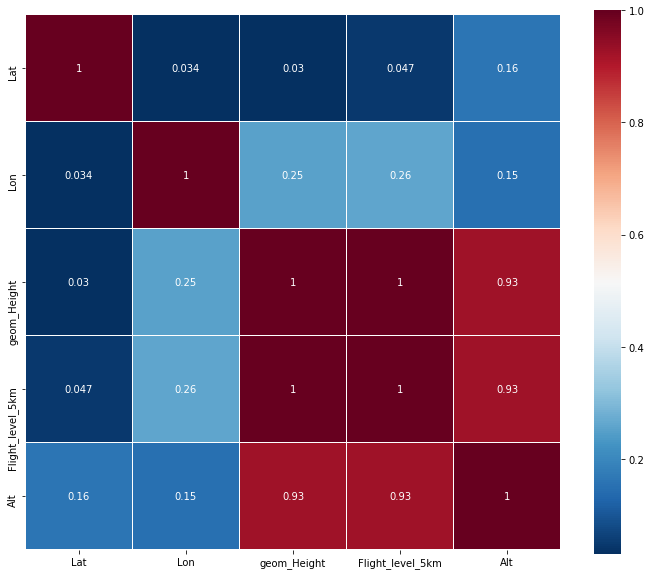

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.RdBu_r, linecolor='white', annot=True)
plt.show()

## Fig. 3, 3D scatter plot showing longitude, latitude and height

The intent here was to try to demonstrate changes in height vs location

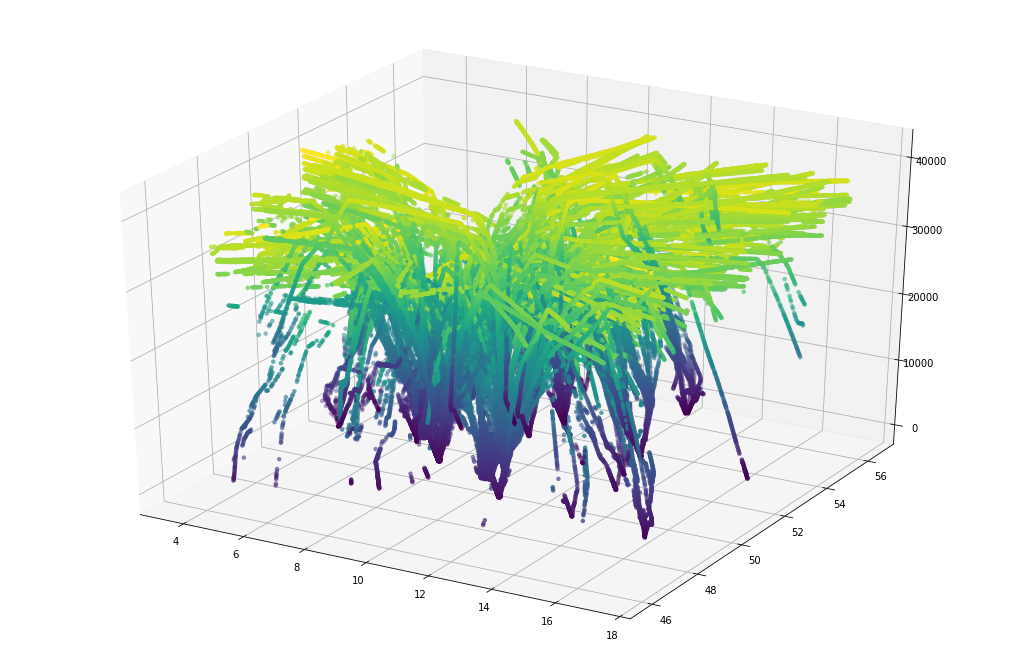

In [ ]:
plt.figure(figsize=(18,12))
ax = plt.axes(projection='3d')
ax.scatter(df['Lon'], df['Lat'], df['geom_Height'],c=df['geom_Height'], linewidth=.005)
plt.show()






## Fig. 4, map of Germany showing flight data

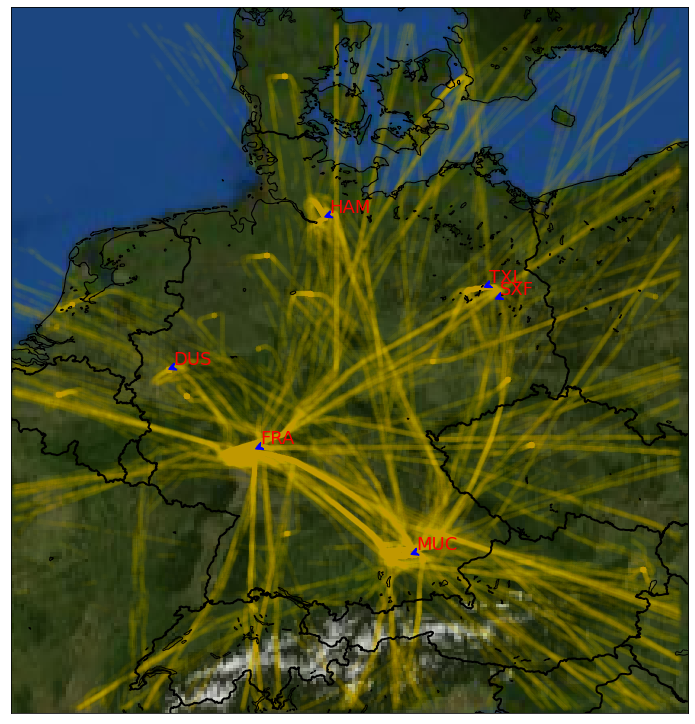

In [ ]:
# Airport coordinate source - https://tools.wmflabs.org/geohack/geohack.php?pagename=Frankfurt_Airport&params=50_02_00_N_008_34_14_E_region:DE-HE_type:airport
# Airport codes source - https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_Germany

plt.figure(figsize=(17,13))

m = Basemap(projection="mill",
            llcrnrlat=45.75,
            llcrnrlon=3.5,
            urcrnrlat=56.75,
            urcrnrlon = 17.5,
            resolution="f")

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.bluemarble()

#Frankfurt airport coordinates
plt.annotate('FRA', xy=m(8.5622, 50.0379),  xytext=(5, 5), textcoords='offset pixels', 
              fontsize=18, color='r', arrowprops=dict(arrowstyle='fancy', color='b')
            )

#Dussledorf airport coordinates
plt.annotate('DUS', xy=m(6.766667, 51.289444),  xytext=(5, 5), textcoords='offset pixels', 
              fontsize=18, color='r', arrowprops=dict(arrowstyle='fancy', color='b')
            )
 
#Hamburg airport coordinates
plt.annotate('HAM', xy=m(9.991111, 53.630278),  xytext=(5, 5), textcoords='offset pixels', 
              fontsize=18, color='r', arrowprops=dict(arrowstyle='fancy', color='b')
            )

#Berlin Tegel airport coordinates
plt.annotate('TXL', xy=m(13.287778, 52.559722),  xytext=(5, 5), textcoords='offset pixels', 
              fontsize=18, color='r', arrowprops=dict(arrowstyle='fancy', color='b')
            )

#Berlin Schonefield airport coordinates
plt.annotate('SXF', xy=m(13.520556, 52.378611),  xytext=(5, 5), textcoords='offset pixels', 
              fontsize=18, color='r', arrowprops=dict(arrowstyle='fancy', color='b')
            )

#Munich airport coordinates
plt.annotate('MUC', xy=m(11.7750, 48.3537),  xytext=(5, 5), textcoords='offset pixels', 
              fontsize=18, color='r', arrowprops=dict(arrowstyle='fancy', color='b')
            )

m.scatter(df["Lon"].values, df["Lat"].values, latlon=True,
          c='#ffd700', alpha=0.015, linewidths=0.001)

plt.show()

## Fig. 5, frequency of flights by hour of day

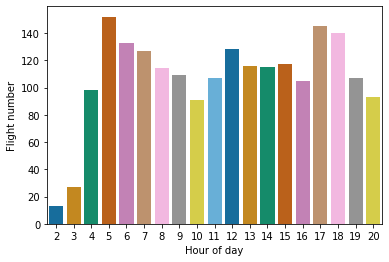

In [ ]:
#Hourly summary excluding potentially incomplete start and end hours of dataset
df_hourly = pd.DataFrame(df.groupby(df.index.hour).nunique())[1:-1]

ax=sns.barplot(df_hourly.index,df_hourly.Emitter_Id,palette="colorblind")
ax.set(xlabel="Hour of day",ylabel="Flight number")
plt.show()

In [ ]:
#Note data is for less than one day
print(f"The original dataset shows flight between {df.index.min()} and {df.index.max()}")

The original dataset shows flight between 2019-04-01 01:58:32.640000+00:00 and 2019-04-01 21:39:08.421000+00:00


# 6. Future analysis

1. Plot flight density visualisation on map   
2. Boxplots of flight time, altitude and speed in German airspace and any outliers
3. Investigate categorising data by major airports based on grid locations and their airport proximity

